# Leads Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1352]:
# Importing the required libraries.

import pandas as pd , numpy as np
import matplotlib.pyplot as plt , seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , 500)






## Step - 1 : Reading and understanding the data.

In [1353]:
# Loading the data set into pandas data frame.

data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Initial inspection of the data set.

In [1354]:
# Checking the shape of the dataframe.
data.shape


(9240, 37)

##### Our dataset contains 9240 rows and 37 colums.

In [1355]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Some columns contain missing/null values , that will be taken care off.

In [1356]:
# Checking the statistical values of the numerical columns using describe function.
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step - 2 : Data Cleaning.

In [1357]:
# Checking for duplicate values in the data.
def check_duplicates(data):
    original_shape = data.shape
    data_copy = data.copy()
    data_copy.drop_duplicates(inplace = True)
    copy_shape = data_copy.shape

    if original_shape==copy_shape :
        return "The data does not contain any duplicate values."
    else :
        return "The data contains duplicate values."
print(check_duplicates(data))


The data does not contain any duplicate values.


##### Our data set does not contain any duplicate values.

#### Missing value treatment.

#### Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.therefore, we will replace these select values with null values. Because these values have arised due to non selection of on option by the customer.

In [1358]:
# Replacing "Select" values with null values.

data = data.replace("Select" , np.nan)

In [1359]:
# Checking for missing values in the data.

data.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [1360]:
column_list = data.columns
missing_value_list = [i for i in column_list if data[i].isnull().mean()*100>40]
missing_value_list

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

##### The above 7 columns have missing values above our threshold of 40% , therefore dropping these columns.

In [1361]:
print(data.shape,": Shape of the data set before dropping")
data = data.drop(missing_value_list , axis = 1)
print(data.shape,": Shape of the data set after dropping")

(9240, 37) : Shape of the data set before dropping
(9240, 30) : Shape of the data set after dropping


##### The columns with missing values have been successfully dropped.

## Step - 3 : Exploratory data analysis and data visualization.

### Analysis of categorical columns.

In [1362]:
# Creating a function for column analysis that will return dtype , number of unique values and value counts of the column.
def column_analysis(x) :
    print("Data type of the column : ",data[x].dtype),print("*"*30),print("Number of unique entities in the column : ",data[x].nunique()),print("*"*30),print("Count of each value in the column : \n",data[x].value_counts(dropna = False)),print("*"*30)
# Creating a function for column analysis that will return a bar graph of the value counts.
def column_visualisation(x) :
    return plt.figure(figsize = [10,5]),sns.countplot(data[x] , hue=data["Converted"],order=data[x].value_counts().index),plt.xlabel(x,fontdict = {"fontsize": 20 , "fontweight" : 10}) ,plt.ylabel("Count" , fontdict = {"fontsize": 20 , "fontweight" : 10}),plt.title("Count Plot : " + x,fontdict = {"fontsize": 25 , "fontweight" : 15 , "color" : "blue"}),plt.xticks(rotation = 90)
    

In [1363]:
# Analysing column "Prospect ID"
print(column_analysis("Prospect ID"))

Data type of the column :  object
******************************
Number of unique entities in the column :  9240
******************************
Count of each value in the column : 
 24368db5-78be-45d5-ae33-e055b5b47a13    1
fa347ce7-9620-46e9-a52c-05fef65f4576    1
63a1124b-e37c-4bf4-96af-8fea900e49ca    1
77c41d95-ff03-4d12-8b91-f4d02f469c9b    1
d0e2b61d-741c-462a-99ac-4b9fe7336501    1
                                       ..
58c2d37c-507c-4749-857e-2f74572cc022    1
e99fa52d-c865-4750-99da-aad6b050cd82    1
78badc53-b91f-4b60-b3a2-d5762e4efffd    1
cb88de9e-545d-4d99-9147-529842216f6f    1
a3aacedf-cc3d-4ec6-8320-5ac156e5f191    1
Name: Prospect ID, Length: 9240, dtype: int64
******************************
None


##### Since the column "Prospect ID" contains all unique values , therefore, it is of no use for our model, hence dropping the column.

In [1364]:
# Dropping column "Prospect ID"
print(data.shape,": Shape of the data set before dropping")
data = data.drop("Prospect ID" , axis = 1)
print(data.shape,": Shape of the data set after dropping")

(9240, 30) : Shape of the data set before dropping
(9240, 29) : Shape of the data set after dropping


In [1365]:
# Analysing column "Lead Number".
print(column_analysis("Lead Number"))

Data type of the column :  int64
******************************
Number of unique entities in the column :  9240
******************************
Count of each value in the column : 
 608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
******************************
None


##### Since the column "Lead Number" contains all unique values , therefore, it is of no use for our model, hence dropping the column.

In [1366]:
# Dropping column "Lead Number"
print(data.shape,": Shape of the data set before dropping")
data = data.drop("Lead Number" , axis = 1)
print(data.shape,": Shape of the data set after dropping")

(9240, 29) : Shape of the data set before dropping
(9240, 28) : Shape of the data set after dropping


Data type of the column :  object
******************************
Number of unique entities in the column :  5
******************************
Count of each value in the column : 
 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
******************************
None


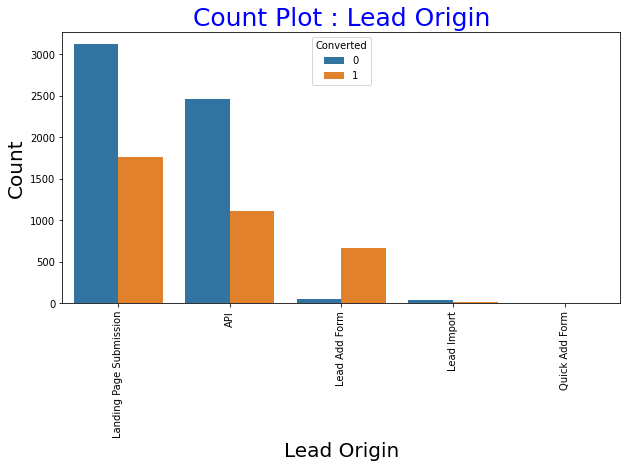

In [1367]:
# Analysing column "Lead Origin".
print(column_analysis("Lead Origin"))
column_visualisation("Lead Origin")
plt.show()

#### Insights :
##### 1. Highest number of leads are coming from "Landing Page Submission" followed by "API".
##### 2. Lead generation from "Lead Add Form" is less but conversion rate is very high.
##### 3. We should focus on lead convertion rate of "Landing Page Submission" and "API".

Data type of the column :  object
******************************
Number of unique entities in the column :  21
******************************
Count of each value in the column : 
 Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
welearnblog_Home        1
testone                 1
youtubechannel          1
WeLearn                 1
blog                    1
Pay per Click Ads       1
Name: Lead Source, dtype: int64
******************************
None


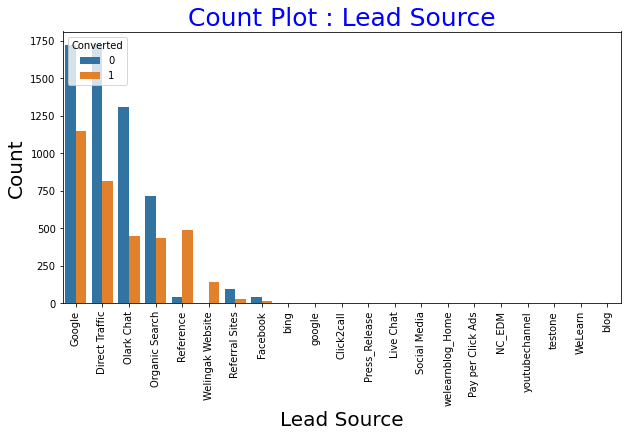

In [1368]:
# Analysing column "Lead Source".
print(column_analysis("Lead Source"))
column_visualisation("Lead Source")
plt.show()

##### The column "Lead Source" contains 36 missing values and 5 values as "google" , therefore, replacing these two with "Google" which is also the mode of this column. We will also replace other less frequently occuring values to "Others".

Data type of the column :  object
******************************
Number of unique entities in the column :  9
******************************
Count of each value in the column : 
 Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              57
Others                21
Name: Lead Source, dtype: int64
******************************
None


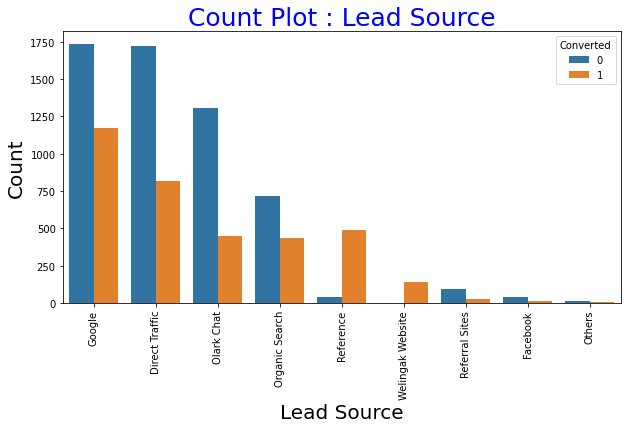

In [1369]:
# Replacing null values in "Lead Source" with mode of the column.
data["Lead Source"] = data["Lead Source"].replace(np.nan , "Google")
data["Lead Source"] = data["Lead Source"].replace("google" , "Google")
data["Lead Source"] = data["Lead Source"].replace("Social Media" , "Facebook")
data["Lead Source"] = data["Lead Source"].replace(["welearnblog_Home","Pay per Click Ads","testone","blog","youtubechannel",
                                                "NC_EDM","WeLearn", "Live Chat","Press_Release","Click2call", "bing"] , "Others")
print(column_analysis("Lead Source"))
column_visualisation("Lead Source")
plt.show()

#### Insights :
##### 1. Highest number of leads are coming from "Google" and "Direct Traffic" followed by "Olark Chat".
##### 2. Highest lead conversion is recorded by "Reference" and "Welingak Website".
##### 3. We should focus on lead conversion rate of "Google" , "Direct Traffic" , "Olark Chat" and "Organic Search".

Data type of the column :  object
******************************
Number of unique entities in the column :  2
******************************
Count of each value in the column : 
 No     8506
Yes     734
Name: Do Not Email, dtype: int64
******************************
None


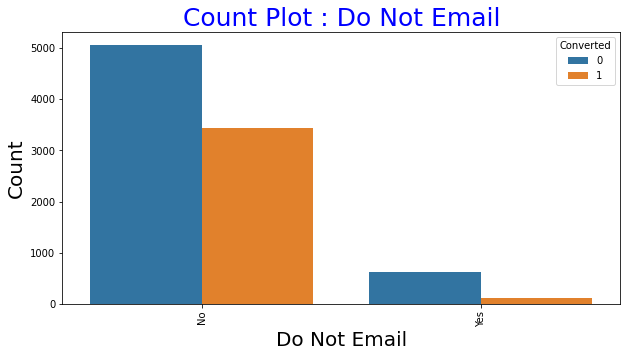

In [1370]:
# Analysing column "Do Not Email".
print(column_analysis("Do Not Email"))
column_visualisation("Do Not Email")
plt.show()

Data type of the column :  object
******************************
Number of unique entities in the column :  2
******************************
Count of each value in the column : 
 No     9238
Yes       2
Name: Do Not Call, dtype: int64
******************************
None


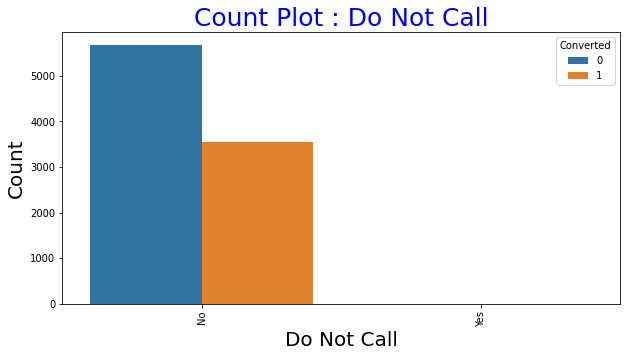

In [1371]:
# Analysing column "Do Not Call".
print(column_analysis("Do Not Call"))
column_visualisation("Do Not Call")
plt.show()

##### Since, the column "Do Not Call" contains all the values as "no" and negligible 2 values as "yes",therefore, it is better to drop this column.

In [1372]:
# Dropping column "Do Not Call"
print(data.shape,": Shape of the data set before dropping")
data = data.drop("Do Not Call" , axis = 1)
print(data.shape,": Shape of the data set after dropping")

(9240, 28) : Shape of the data set before dropping
(9240, 27) : Shape of the data set after dropping


Data type of the column :  object
******************************
Number of unique entities in the column :  17
******************************
Count of each value in the column : 
 Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64
******************************
None


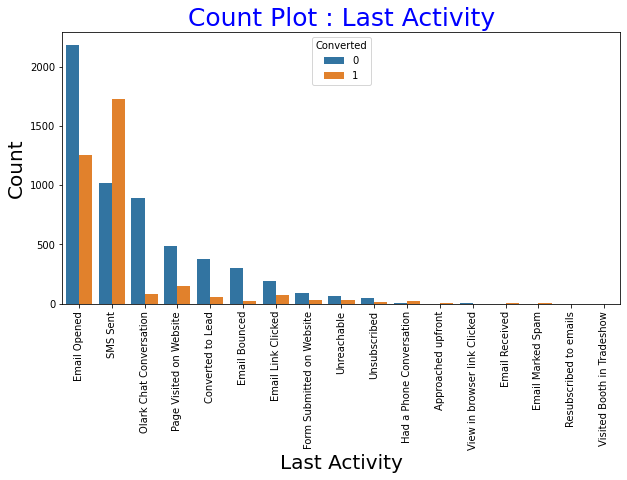

In [1373]:
# Analysing column "Last Activity".
print(column_analysis("Last Activity"))
column_visualisation("Last Activity")
plt.show()

##### The column "Last Activity" contains 103 missing values which we will be imputing with the mode of the column and we will also convert less frequently occuring values with "Others".

Data type of the column :  object
******************************
Number of unique entities in the column :  13
******************************
Count of each value in the column : 
 Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         12
Approached upfront              9
Name: Last Activity, dtype: int64
******************************
None


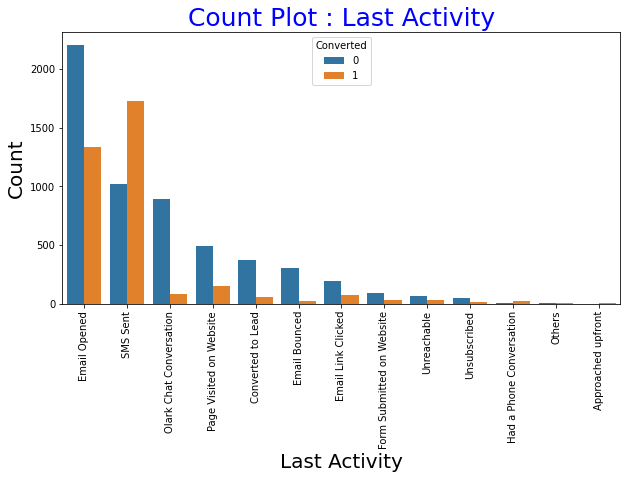

In [1374]:
# Replacing null values with the mode of the column.
data["Last Activity"] = data["Last Activity"].replace(np.nan , data["Last Activity"].mode()[0])
data["Last Activity"] = data["Last Activity"].replace(["Resubscribed to emails","Visited Booth in Tradeshow",
                                "Email Marked Spam","Email Received","View in browser link Clicked"] , "Others")
print(column_analysis("Last Activity"))
column_visualisation("Last Activity")
plt.show()

#### Insights :
##### 1. Most leads are coming from "Email Opened" followed by "SMS Sent"
##### 2. "Olark Chat Conversation" is generating high humber of leads but its conversion rate is very poor.
##### 3. The conversion rate is good in case of "SMS Sent".
##### 4. We should focus on improving the conversion rate of "Email Opened" as well as "Olark Chat Conversation".

Data type of the column :  object
******************************
Number of unique entities in the column :  38
******************************
Count of each value in the column : 
 India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Germany                    4
Canada                     4
Nigeria                    4
Sweden                     3
Ghana                      2
China                      2
Bangladesh                 2
Italy                      2
Philippines                2
Netherlands                2
Uganda                     2
Belgium                    2
Asia/Pac

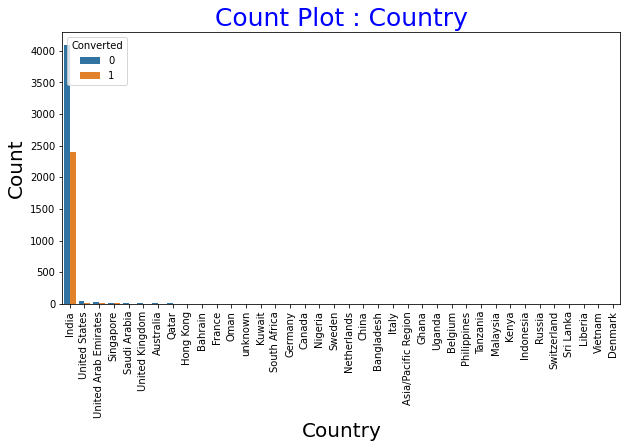

In [1375]:
# Analysing column "Country".
print(column_analysis("Country"))
column_visualisation("Country")
plt.show()

##### The column "Country" contains 2461 missing values which we will be imputing with the mode of the column.

Data type of the column :  object
******************************
Number of unique entities in the column :  38
******************************
Count of each value in the column : 
 India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Germany                    4
Canada                     4
Nigeria                    4
Sweden                     3
Netherlands                2
China                      2
Bangladesh                 2
Italy                      2
Asia/Pacific Region        2
Ghana                      2
Uganda                     2
Belgium                    2
Philippines                2
Tanzania

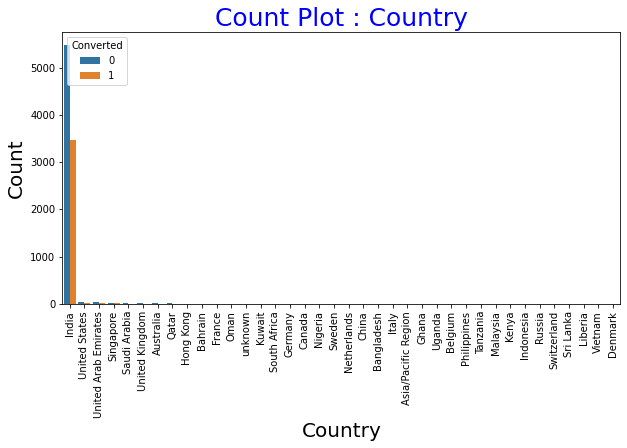

In [1376]:
# Replacing null values with the mode of the column.
data["Country"] = data["Country"].replace(np.nan , data["Country"].mode()[0])
print(column_analysis("Country"))
column_visualisation("Country")
plt.show()



##### As we can see that about 97 % of the entries in the column "Country" is taken by only 1 value ie "India", therefore it is better we drop this column.

In [1377]:
# Dropping column "Country"
print(data.shape,": Shape of the data set before dropping")
data = data.drop("Country" , axis = 1)
print(data.shape,": Shape of the data set after dropping")

(9240, 27) : Shape of the data set before dropping
(9240, 26) : Shape of the data set after dropping


Data type of the column :  object
******************************
Number of unique entities in the column :  18
******************************
Count of each value in the column : 
 NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, 

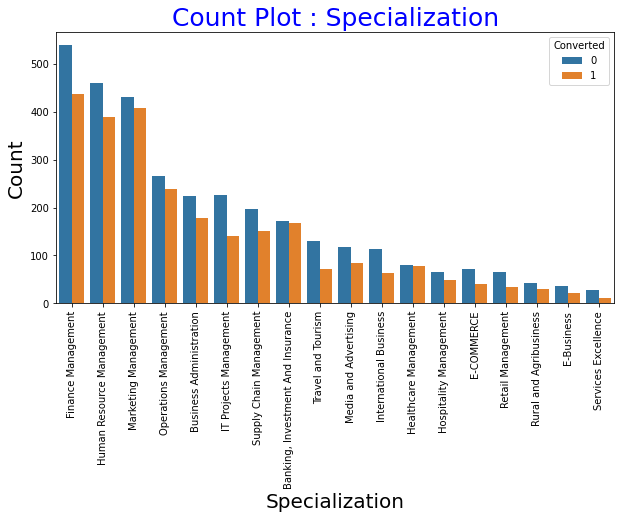

In [1378]:
# Analysing column "Specialization".
print(column_analysis("Specialization"))
column_visualisation("Specialization")
plt.show()

##### There are 3380 missing values in the column "Speacialization". This might be cause the people filling the form could not find their specialization in the list of options or they might not have done any specialization till now. Therefore, we will impute these missing values with "Not Provided".

Data type of the column :  object
******************************
Number of unique entities in the column :  19
******************************
Count of each value in the column : 
 Not Provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, 

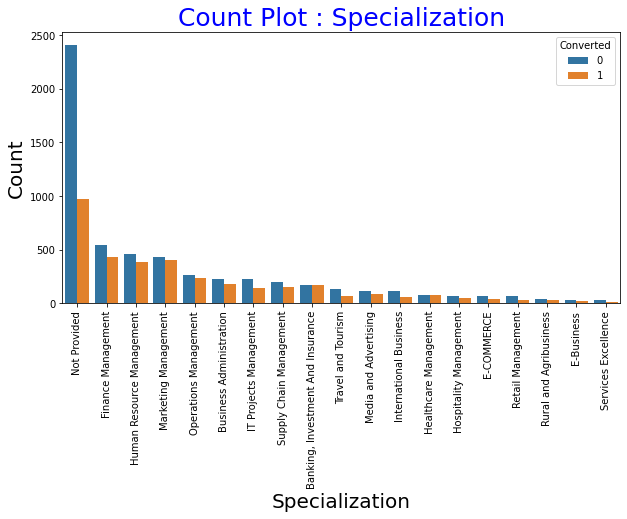

In [1379]:
# Imputing the missing values with "Not Provided"
data["Specialization"] = data["Specialization"].replace(np.nan , "Not Provided")
print(column_analysis("Specialization"))
column_visualisation("Specialization")
plt.show()


#### Insights :
##### 1. Highest number of lead generators are the people from management specialization.

Data type of the column :  object
******************************
Number of unique entities in the column :  6
******************************
Count of each value in the column : 
 Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
******************************
None


(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Count Plot : What is your current occupation'}, xlabel='What is your current occupation', ylabel='Count'>,
 Text(0.5, 0, 'What is your current occupation'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count Plot : What is your current occupation'),
 (array([0, 1, 2, 3, 4, 5]),
  [Text(0, 0, 'Unemployed'),
   Text(1, 0, 'Working Professional'),
   Text(2, 0, 'Student'),
   Text(3, 0, 'Other'),
   Text(4, 0, 'Housewife'),
   Text(5, 0, 'Businessman')]))

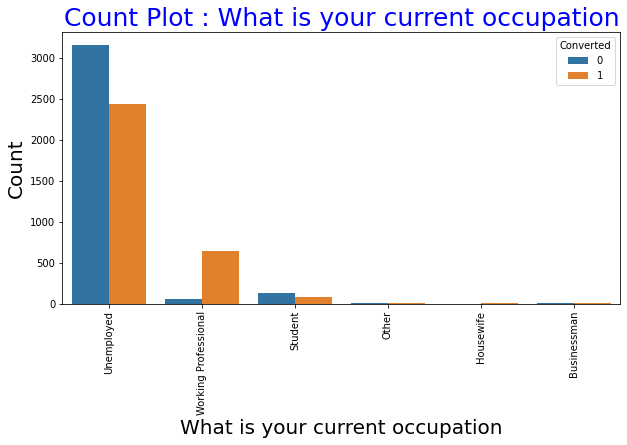

In [1380]:
# Analysing column "What is your current occupation".
print(column_analysis("What is your current occupation"))
column_visualisation("What is your current occupation")


##### The column "What is your current occupation" contains 2690 missing values which we will be imputing with the mode of the column.

Data type of the column :  object
******************************
Number of unique entities in the column :  6
******************************
Count of each value in the column : 
 Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
******************************
None


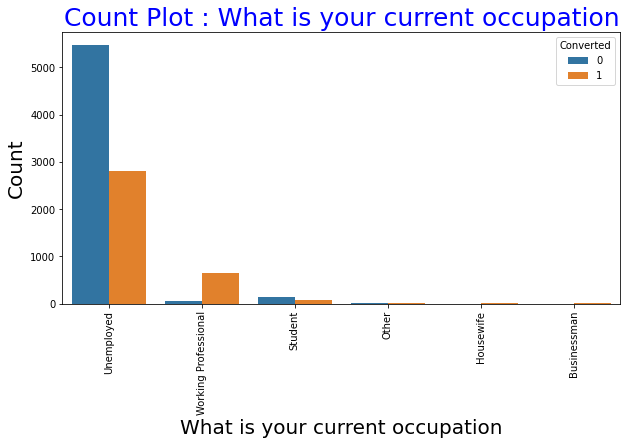

In [1381]:
data["What is your current occupation"] = data["What is your current occupation"].replace(np.nan , data["What is your current occupation"].mode()[0])
print(column_analysis("What is your current occupation"))
column_visualisation("What is your current occupation")
plt.show()


#### Insights :
##### 1. Highest number of leads are coming from the unemployed category.
##### 2. Conversion rate of "Working Professional" category is quite high as compared to other categories.

Data type of the column :  object
******************************
Number of unique entities in the column :  3
******************************
Count of each value in the column : 
 Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
******************************
None


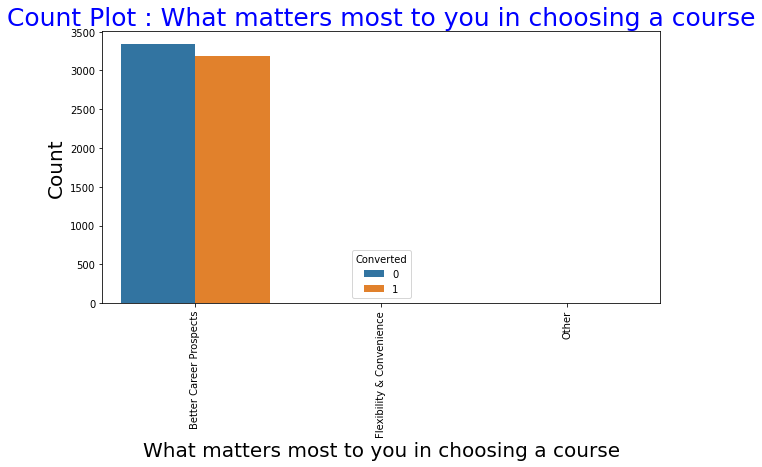

In [1382]:
# Analysing column "What matters most to you in choosing a course".
print(column_analysis("What matters most to you in choosing a course"))
column_visualisation("What matters most to you in choosing a course")
plt.show()

##### The column "What matters most to you in choosing a course" contains 2709 missing values which we will be imputing with the mode of the column.

Data type of the column :  object
******************************
Number of unique entities in the column :  3
******************************
Count of each value in the column : 
 Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
******************************
None


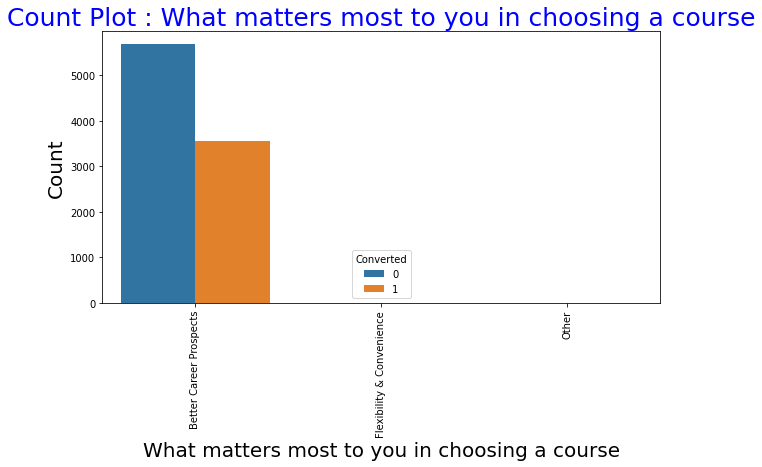

In [1383]:
data["What matters most to you in choosing a course"] = data["What matters most to you in choosing a course"].replace(np.nan , data["What matters most to you in choosing a course"].mode()[0])
print(column_analysis("What matters most to you in choosing a course"))
column_visualisation("What matters most to you in choosing a course")
plt.show()



##### This column if flooded with only one type of values ie "Better Career Prospects" , hence, it is better to drop this column.

In [1384]:
# Dropping column "What matters most to you in choosing a course".
print(data.shape,": Shape of the data set before dropping")
data = data.drop("What matters most to you in choosing a course" , axis = 1)
print(data.shape,": Shape of the data set after dropping")

(9240, 26) : Shape of the data set before dropping
(9240, 25) : Shape of the data set after dropping


**************************************Search**************************************
Data type of the column :  object
******************************
Number of unique entities in the column :  2
******************************
Count of each value in the column : 
 No     9226
Yes      14
Name: Search, dtype: int64
******************************
None


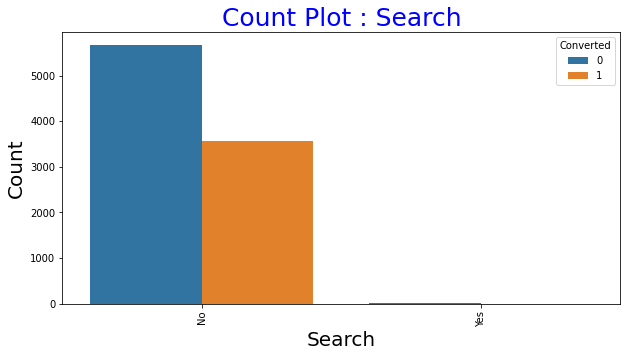

**************************************Magazine**************************************
Data type of the column :  object
******************************
Number of unique entities in the column :  1
******************************
Count of each value in the column : 
 No    9240
Name: Magazine, dtype: int64
******************************
None


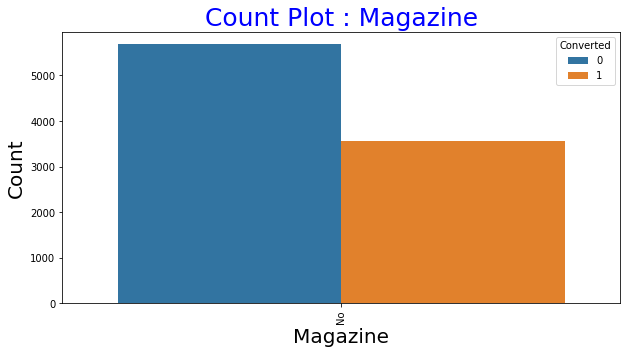

**************************************Newspaper Article**************************************
Data type of the column :  object
******************************
Number of unique entities in the column :  2
******************************
Count of each value in the column : 
 No     9238
Yes       2
Name: Newspaper Article, dtype: int64
******************************
None


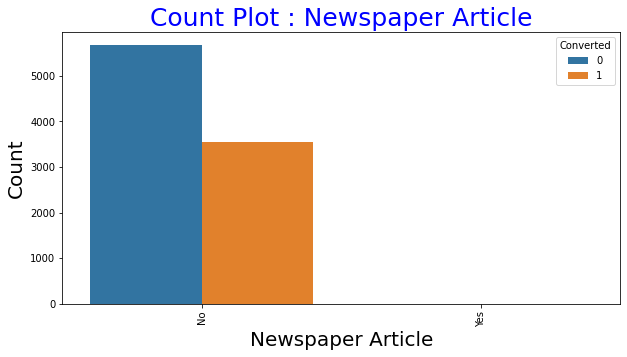

**************************************X Education Forums**************************************
Data type of the column :  object
******************************
Number of unique entities in the column :  2
******************************
Count of each value in the column : 
 No     9239
Yes       1
Name: X Education Forums, dtype: int64
******************************
None


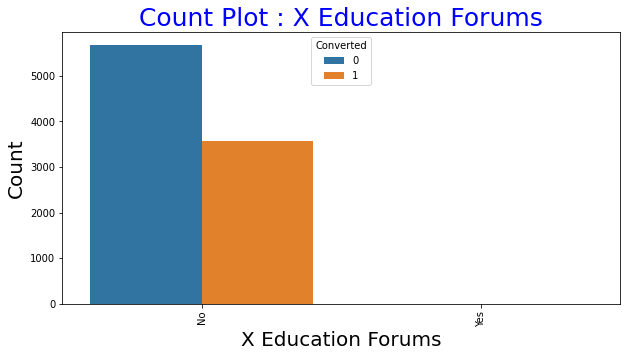

**************************************Newspaper**************************************
Data type of the column :  object
******************************
Number of unique entities in the column :  2
******************************
Count of each value in the column : 
 No     9239
Yes       1
Name: Newspaper, dtype: int64
******************************
None


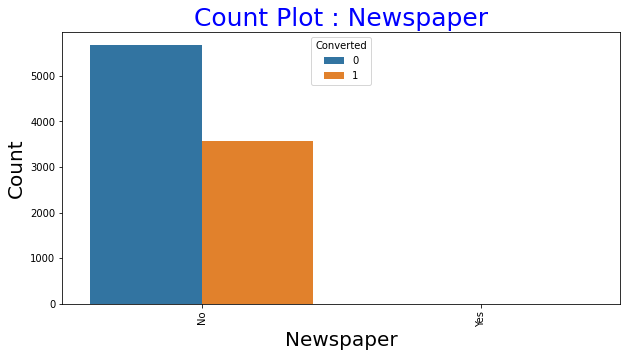

**************************************Digital Advertisement**************************************
Data type of the column :  object
******************************
Number of unique entities in the column :  2
******************************
Count of each value in the column : 
 No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
******************************
None


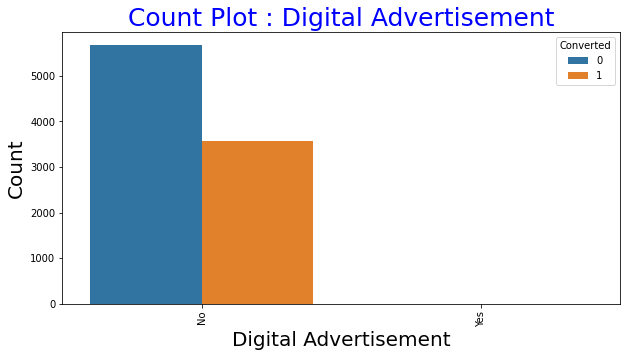

In [1385]:
# Creating a list of similar columns to be analysed and visualised.

l = ["Search" , "Magazine" , "Newspaper Article","X Education Forums" ,"Newspaper" , "Digital Advertisement" ]

# Creating a for loop for analysing similar columns.
for i in l :
    print("**************************************"+ i + "**************************************")
    print(column_analysis(i))
    column_visualisation(i)
    plt.show()



##### As we can see that these columns are highly imbalanced towards one value ie "No". Therefore, we will drop these columns as they are not going to serve any purpose for our model building process.

In [1386]:
# Dropping the above mentioned columns.
print(data.shape,": Shape of the data set before dropping")
data = data.drop(l , axis = 1)
print(data.shape,": Shape of the data set after dropping")

(9240, 25) : Shape of the data set before dropping
(9240, 19) : Shape of the data set after dropping


**************************************Through Recommendations**************************************
Data type of the column :  object
******************************
Number of unique entities in the column :  2
******************************
Count of each value in the column : 
 No     9233
Yes       7
Name: Through Recommendations, dtype: int64
******************************
None


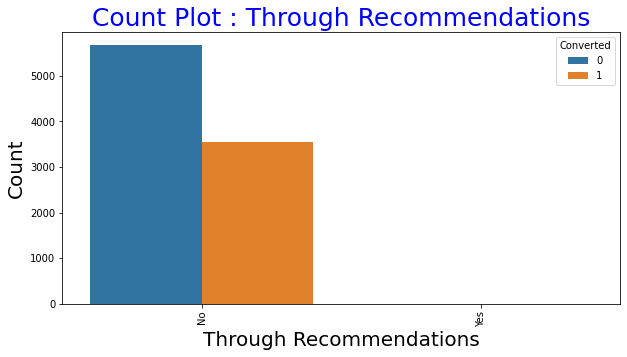

**************************************Receive More Updates About Our Courses**************************************
Data type of the column :  object
******************************
Number of unique entities in the column :  1
******************************
Count of each value in the column : 
 No    9240
Name: Receive More Updates About Our Courses, dtype: int64
******************************
None


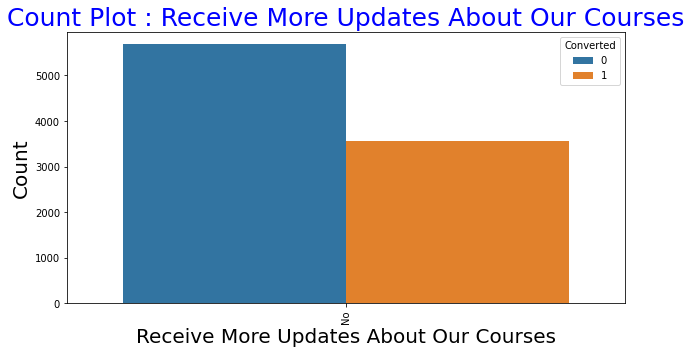

**************************************Update me on Supply Chain Content**************************************
Data type of the column :  object
******************************
Number of unique entities in the column :  1
******************************
Count of each value in the column : 
 No    9240
Name: Update me on Supply Chain Content, dtype: int64
******************************
None


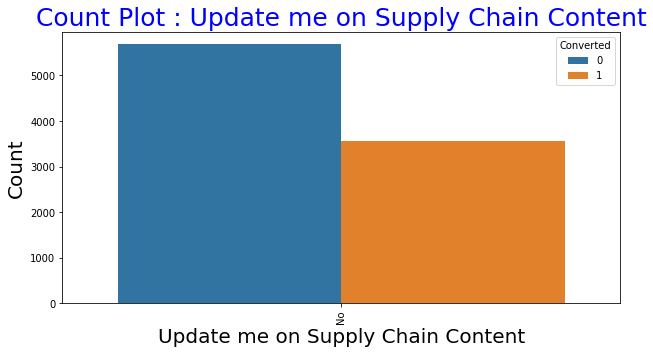

**************************************Get updates on DM Content**************************************
Data type of the column :  object
******************************
Number of unique entities in the column :  1
******************************
Count of each value in the column : 
 No    9240
Name: Get updates on DM Content, dtype: int64
******************************
None


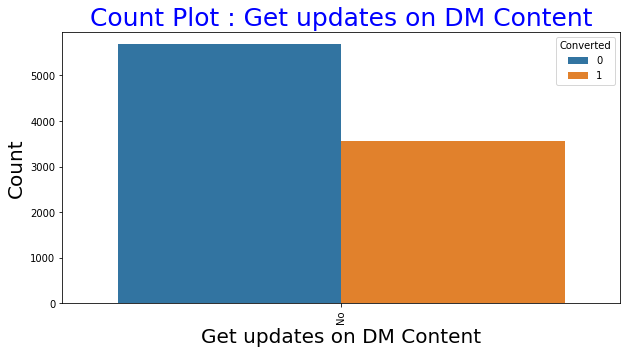

**************************************I agree to pay the amount through cheque**************************************
Data type of the column :  object
******************************
Number of unique entities in the column :  1
******************************
Count of each value in the column : 
 No    9240
Name: I agree to pay the amount through cheque, dtype: int64
******************************
None


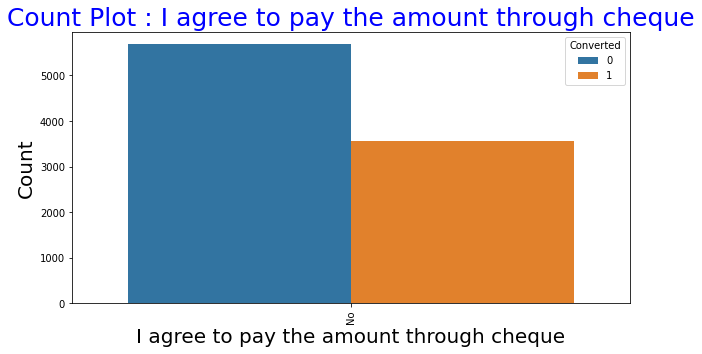

**************************************A free copy of Mastering The Interview**************************************
Data type of the column :  object
******************************
Number of unique entities in the column :  2
******************************
Count of each value in the column : 
 No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
******************************
None


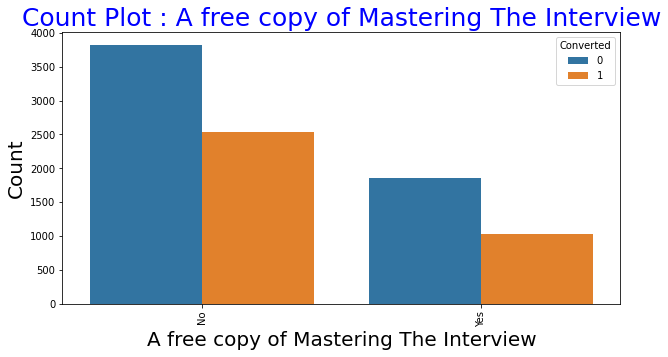

In [1387]:
# Creating a list of similar columns to be analysed and visualised.

l = ["Through Recommendations" , "Receive More Updates About Our Courses" , 
     "Update me on Supply Chain Content","Get updates on DM Content" ,"I agree to pay the amount through cheque" , 
     "A free copy of Mastering The Interview" ]

# Creating a for loop for analysing similar columns.
for i in l :
    print("**************************************"+ i + "**************************************")
    print(column_analysis(i))
    column_visualisation(i)
    plt.show()



##### All the above mentioned columns are highly imbalanced towards "No" except the column "A free copy of Mastering The Interview". Therefore,we are dropping all the columns except "A free copy of Mastering The Interview" as those 5 columns are not going to contribute in our model building process.

In [1388]:
# Removing our column name from the list of columns to be dropped.

l.remove("A free copy of Mastering The Interview")

# Dropping the columns.
print(data.shape,": Shape of the data set before dropping")
data = data.drop(l , axis = 1)
print(data.shape,": Shape of the data set after dropping")

(9240, 19) : Shape of the data set before dropping
(9240, 14) : Shape of the data set after dropping


Data type of the column :  object
******************************
Number of unique entities in the column :  26
******************************
Count of each value in the column : 
 NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong nu

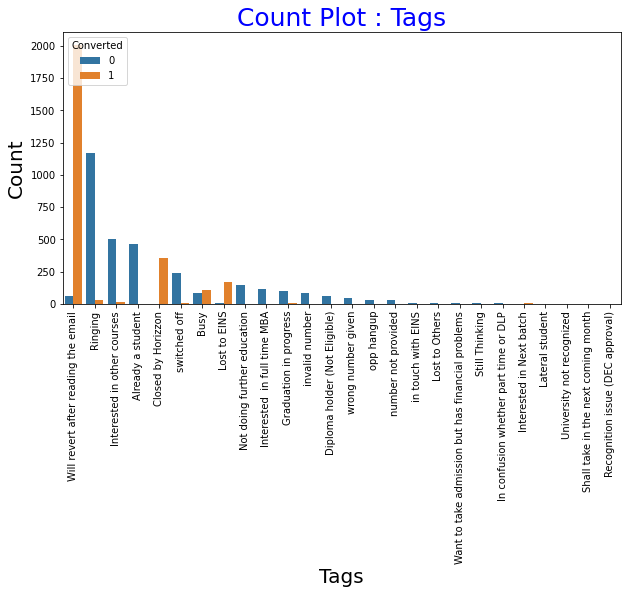

In [1389]:
# Analysing column "Tags".
print(column_analysis("Tags"))
column_visualisation("Tags")
plt.show()

In [1390]:
# Replacing the null/missing values with "Not Tagged"

data["Tags"] = data["Tags"].replace(np.nan , "Not Tagged")

In [1391]:
# Replacing less frequently occuring values with "Others"

data["Tags"] = data["Tags"].replace(["Recognition issue (DEC approval)" , "Shall take in the next coming month",
                                    "University not recognized" , "Lateral student","Interested in Next batch" , 
                                    "In confusion whether part time or DLP" , "Want to take admission but has financial problems",
                                    "Still Thinking" , "Lost to Others" , "in touch with EINS"] , "Others")

# Combining values "number not provided" , "wrong number given" , "invalid number" into one entity ie "invalid number"

data["Tags"] = data["Tags"].replace(["number not provided" , "wrong number given"] , "invalid number")

Data type of the column :  object
******************************
Number of unique entities in the column :  16
******************************
Count of each value in the column : 
 Not Tagged                             3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
invalid number                          157
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Diploma holder (Not Eligible)            63
Others                                   49
opp hangup                               33
Name: Tags, dtype: int64
******************************
None


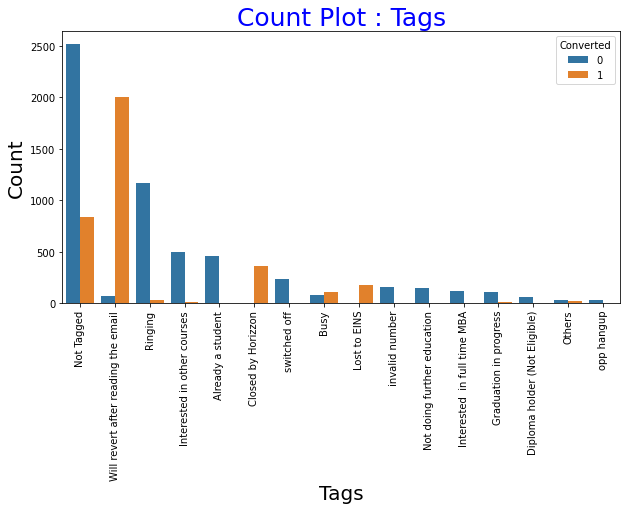

In [1392]:
# Analysing column "Tags" after data cleaning.
print(column_analysis("Tags"))
column_visualisation("Tags")
plt.show()

Data type of the column :  object
******************************
Number of unique entities in the column :  6
******************************
Count of each value in the column : 
 NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
******************************
None


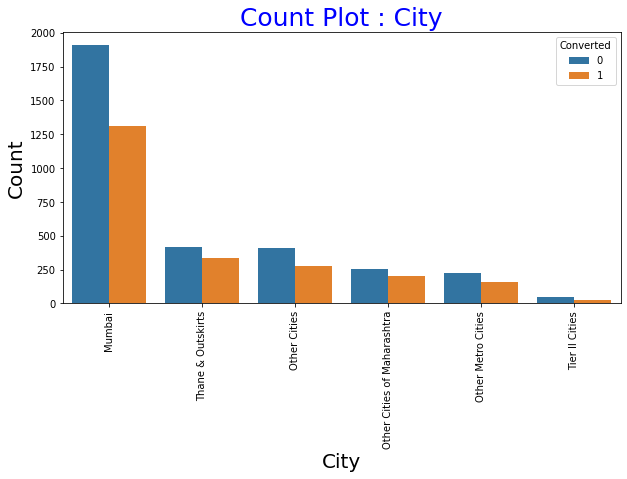

In [1393]:
# Analysing column "City".
print(column_analysis("City"))
column_visualisation("City")
plt.show()

Data type of the column :  object
******************************
Number of unique entities in the column :  7
******************************
Count of each value in the column : 
 Not Provided                   3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64
******************************
None


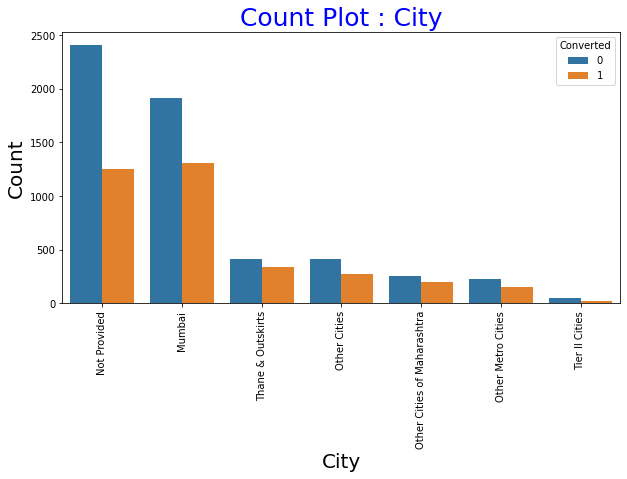

In [1394]:
# Replacing null/missing values in the column "City" with "Not Provided"

data["City"] = data["City"].replace(np.nan , "Not Provided")

# Analysing column "City".
print(column_analysis("City"))
column_visualisation("City")
plt.show()

Data type of the column :  object
******************************
Number of unique entities in the column :  16
******************************
Count of each value in the column : 
 Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64
******************************
None


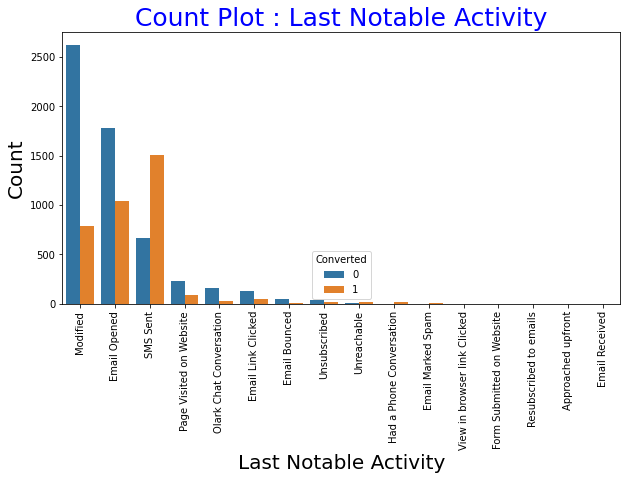

In [1395]:
# Analysing column "Last Notable Activity".
print(column_analysis("Last Notable Activity"))
column_visualisation("Last Notable Activity")
plt.show()

Data type of the column :  object
******************************
Number of unique entities in the column :  11
******************************
Count of each value in the column : 
 Modified                    3407
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
Others                         7
Name: Last Notable Activity, dtype: int64
******************************
None


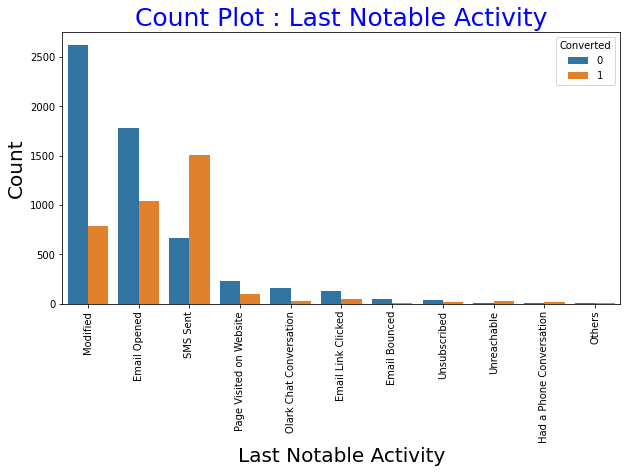

In [1396]:
# Combining less frequently occuring values together into one ie "Others".

data["Last Notable Activity"] = data["Last Notable Activity"].replace(["View in browser link Clicked" , 
                                    "Form Submitted on Website" , "Resubscribed to emails" , "Email Received",
                                    "Approached upfront" , "Email Marked Spam"], "Others")

# Analysing column "Last Notable Activity" after data cleaning.
print(column_analysis("Last Notable Activity"))
column_visualisation("Last Notable Activity")
plt.show()

### Analysis of numerical columns.

0    5679
1    3561
Name: Converted, dtype: int64


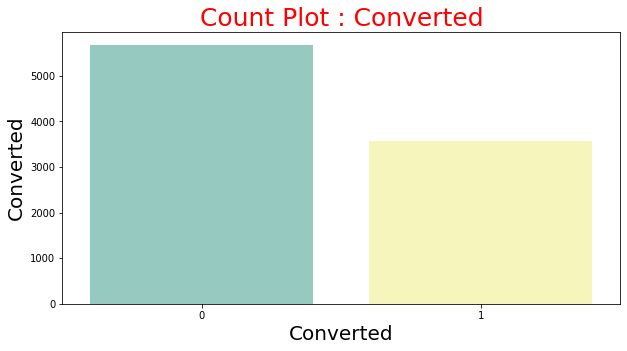

In [1397]:
# Visualising our target column "Converted" to find out any imbalance in the data.

print(data["Converted"].value_counts())
plt.figure(figsize = [10,5])
sns.countplot(data["Converted"] , palette="Set3")
plt.title("Count Plot : Converted" , fontdict = {"fontsize" : 25,"fontweight":15,"color":"red"})
plt.xlabel("Converted" , fontdict = {"fontsize" : 20,"fontweight":10})
plt.ylabel("Converted" , fontdict = {"fontsize" : 20,"fontweight":10})
plt.show()

##### No imbalance in the target column.

In [1398]:
# Creating a list of numerical columns

num_cols = ["TotalVisits","Total Time Spent on Website" , "Page Views Per Visit" ]





In [1399]:
# Checking for null values in the numerical columns.
data[num_cols].isnull().mean()*100

TotalVisits                    1.482684
Total Time Spent on Website    0.000000
Page Views Per Visit           1.482684
dtype: float64

##### There are null values present in the columns "TotalVisits" and "Page Views Per Visit". Hence, we will impute them with the median of the respective column.

In [1400]:
# Imputing the missing values with median.

data["TotalVisits"] = data["TotalVisits"].fillna(data["TotalVisits"].median())
data["Page Views Per Visit"] = data["Page Views Per Visit"].fillna(data["Page Views Per Visit"].median())

In [1401]:
# Checking for null values in the numerical columns.
data[num_cols].isnull().mean()*100

TotalVisits                    0.0
Total Time Spent on Website    0.0
Page Views Per Visit           0.0
dtype: float64

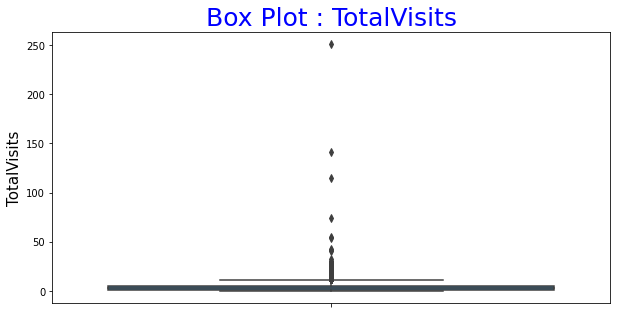

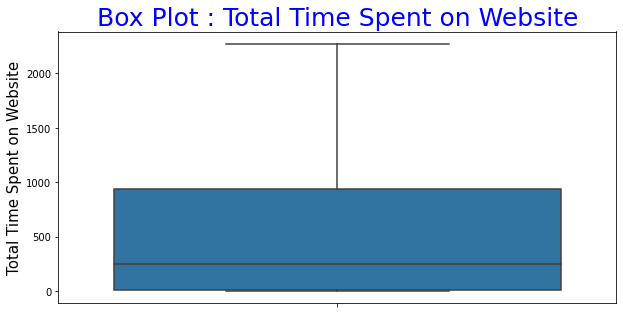

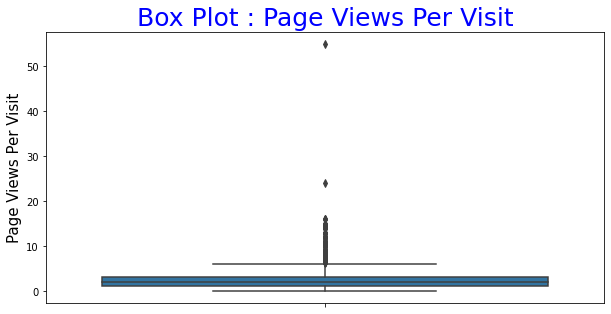

In [1402]:
# Visualising numerical columns with the help of a box plot.

for i in num_cols :
    plt.figure(figsize = [10,5])
    sns.boxplot(data[i] , orient="v")
    plt.ylabel(i , fontdict = {"fontsize": 15 , "fontweight" : 10})
    plt.title("Box Plot : " + i,fontdict = {"fontsize": 25 , "fontweight" : 15 , "color" : "blue"})
    plt.show()

##### The columns "TotalVisits" and "Page Views Per Visit" contain outliers also, we will treat the outliers by capping.

In [1403]:
num_cols = ["TotalVisits" , "Page Views Per Visit" ]

# Creating a function for outliear treatment.

def capping(x) :
    if x>=lowerbound and x<=upperbound:
        return x
    elif x<lowerbound :
        return lowerbound
    elif x>upperbound :
        return upperbound



for i in num_cols :
    Q3 = data[i].quantile(0.75)
    Q1 = data[i].quantile(0.25)
    IQR = Q3-Q1
    upperbound = Q3+(1.5*IQR)
    lowerbound = Q1-(1.5*IQR)
    data[i] = data[i].apply(capping )


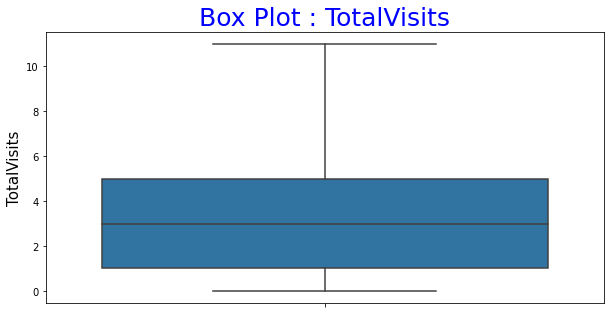

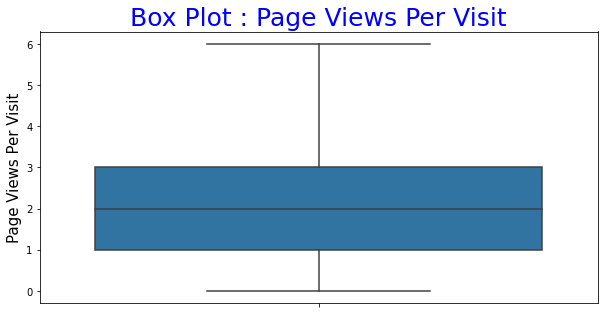

In [1404]:
# Visualising numerical columns with the help of a box plot after outlier treatment.

for i in num_cols :
    plt.figure(figsize = [10,5])
    sns.boxplot(data[i] , orient="v")
    plt.ylabel(i , fontdict = {"fontsize": 15 , "fontweight" : 10})
    plt.title("Box Plot : " + i,fontdict = {"fontsize": 25 , "fontweight" : 15 , "color" : "blue"})
    plt.show()

##### Outliers treated successfully.

### Visualising numerical columns with our target variable.

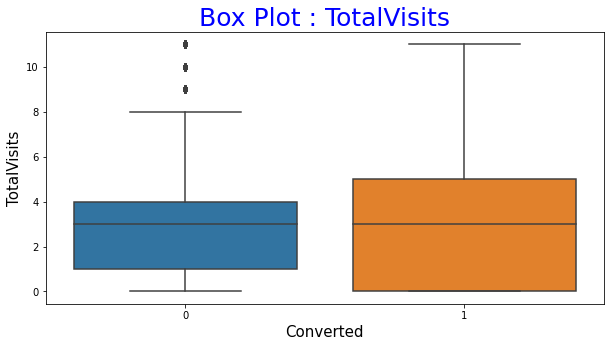

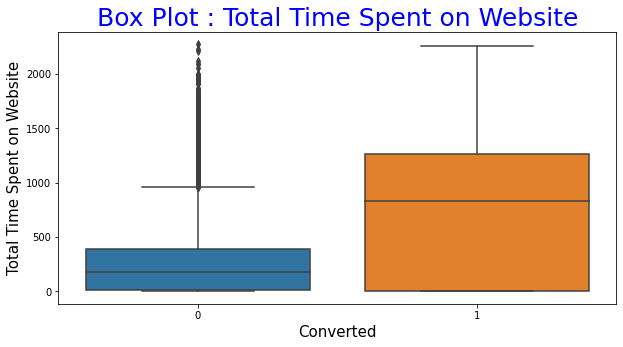

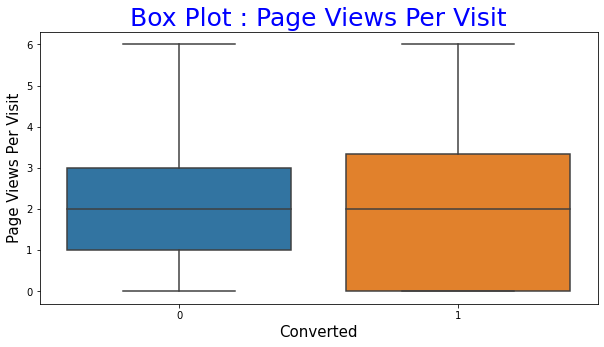

In [1405]:
num_cols = ["TotalVisits","Total Time Spent on Website" , "Page Views Per Visit" ]

for i in num_cols :
    plt.figure(figsize = [10,5])
    sns.boxplot(x = "Converted" , y = i , data = data , orient="v")
    plt.ylabel(i , fontdict = {"fontsize": 15 , "fontweight" : 10})
    plt.xlabel("Converted" , fontdict = {"fontsize": 15 , "fontweight" : 10})
    plt.title("Box Plot : " + i,fontdict = {"fontsize": 25 , "fontweight" : 15 , "color" : "blue"})
    plt.show()

# Visualising numerical columns with the help of a heat map.

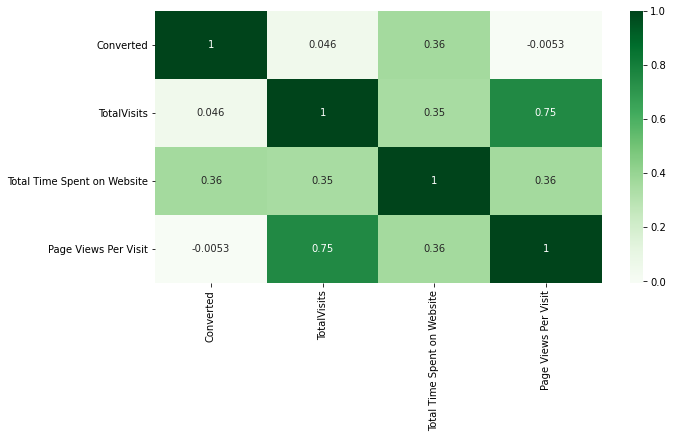

In [1406]:
d = data.corr()
plt.figure(figsize = [10,5])
sns.heatmap(d , annot=True , cmap = "Greens")
plt.show()

##### Variables "TotalVisits" and "Page Views Per Visit" have a high correlation.

## Step - 4 : Data Preparation.

### Now we will do binary mapping of columns "A free copy of Mastering The Interview" and "Do Not Email" as they contain only 2 categories ie. "Yes" and "No".


In [1407]:
print(column_analysis("A free copy of Mastering The Interview"))
print("_______________________________________________________________")
print(column_analysis("Do Not Email"))

Data type of the column :  object
******************************
Number of unique entities in the column :  2
******************************
Count of each value in the column : 
 No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
******************************
None
_______________________________________________________________
Data type of the column :  object
******************************
Number of unique entities in the column :  2
******************************
Count of each value in the column : 
 No     8506
Yes     734
Name: Do Not Email, dtype: int64
******************************
None


In [1408]:
# Creating a list of columns at which binary mapping is to be performed.

l = ["A free copy of Mastering The Interview" , "Do Not Email"]


# Defing a function binary_mapping to map the values "Yes" with 1 and "No" with 0.

def binary_mapping(x) :
    return x.map({"Yes" : 1 , "No" : 0})
    
# Applying the function to our concerned columns.

data[l] = data[l].apply(binary_mapping)



In [1409]:
print(column_analysis("A free copy of Mastering The Interview"))
print("_______________________________________________________________")
print(column_analysis("Do Not Email"))

Data type of the column :  int64
******************************
Number of unique entities in the column :  2
******************************
Count of each value in the column : 
 0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64
******************************
None
_______________________________________________________________
Data type of the column :  int64
******************************
Number of unique entities in the column :  2
******************************
Count of each value in the column : 
 0    8506
1     734
Name: Do Not Email, dtype: int64
******************************
None


### Dummy variables.

In [1410]:
# Renaming the column "What is your current occupation" with "Current Occupation" as this long name 
# will create disturbance after creating dummy variables.

data = data.rename(columns={"What is your current occupation" : "Current Occupation"})



In [1411]:
# Creating a list of columns on which we will create dummy variables.

dummy_list = ["Lead Origin" ,"Lead Source" , "Last Activity" , "Specialization" , "Current Occupation" , "Tags",
             "City" , "Last Notable Activity"]

In [1412]:
# Checking the datatypes of our variables
data[dummy_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Lead Origin            9240 non-null   object
 1   Lead Source            9240 non-null   object
 2   Last Activity          9240 non-null   object
 3   Specialization         9240 non-null   object
 4   Current Occupation     9240 non-null   object
 5   Tags                   9240 non-null   object
 6   City                   9240 non-null   object
 7   Last Notable Activity  9240 non-null   object
dtypes: object(8)
memory usage: 577.6+ KB


In [1413]:
# Changing the datatype of columns from object to category.
for i in dummy_list :
    data[i] = data[i].astype("category")
data[dummy_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Lead Origin            9240 non-null   category
 1   Lead Source            9240 non-null   category
 2   Last Activity          9240 non-null   category
 3   Specialization         9240 non-null   category
 4   Current Occupation     9240 non-null   category
 5   Tags                   9240 non-null   category
 6   City                   9240 non-null   category
 7   Last Notable Activity  9240 non-null   category
dtypes: category(8)
memory usage: 76.1 KB


In [1414]:
# Creating dummy variables.

data = pd.get_dummies(data , drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 84 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Do Not Email                                    9240 non-null   int64  
 1   Converted                                       9240 non-null   int64  
 2   TotalVisits                                     9240 non-null   float64
 3   Total Time Spent on Website                     9240 non-null   int64  
 4   Page Views Per Visit                            9240 non-null   float64
 5   A free copy of Mastering The Interview          9240 non-null   int64  
 6   Lead Origin_Landing Page Submission             9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                       9240 non-null   uint8  
 8   Lead Origin_Lead Import                         9240 non-null   uint8  
 9   Lead Origin_Quick Add Form               

In [1415]:
# Checking the shape of the data set after dummy creation.
data.shape

(9240, 84)

## Step 5 : Splitting the data into training and test sets.

In [1416]:
# Importing required libraries for the train test split

import sklearn
from sklearn.model_selection import train_test_split

In [1417]:
np.random.seed(0)

In [1418]:
data_train , data_test = train_test_split(data , train_size=0.70 , test_size=0.30 , random_state=100)

In [1419]:
# Checking the shape of train and test data.

print("data_train : ",data_train.shape)
print("*****************************")
print("data_test : ",data_test.shape)

data_train :  (6468, 84)
*****************************
data_test :  (2772, 84)


## Step - 6 : Rescalling of numerical features. We will use min max scaler.

In [1420]:
# Importing required libraries for rescaling.

from sklearn.preprocessing import MinMaxScaler

In [1421]:
# Creating an instance of MinMaxScaler

scaler = MinMaxScaler()

In [1422]:
# Creating a list of numerical coulumns on which we will perform scaling.

num_cols = ["TotalVisits" ,"Total Time Spent on Website" , "Page Views Per Visit" ]

In [1423]:
# Rescaling of numerical features.

data_train[num_cols] = scaler.fit_transform(data_train[num_cols])
data_test[num_cols] = scaler.transform(data_test[num_cols])

In [1424]:
data_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Tagged,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,City_Not Provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6795,0,0,0.363636,0.214349,0.221667,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3516,0,0,0.454545,0.046655,0.416667,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8105,0,0,0.454545,0.541373,0.833333,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1425]:
data_train.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Tagged,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,City_Not Provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.381262,0.292025,0.212974,0.374255,0.311843,0.528139,0.079468,0.005102,0.000155,0.005411,0.320810,0.190167,0.121058,0.002474,0.060297,0.014224,0.014069,0.046073,0.036333,0.028293,0.381262,0.012678,0.003401,0.102195,0.001546,0.072047,0.300402,0.008813,0.006030,0.043599,0.005720,0.012987,0.105442,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.367502,0.057205,0.010823,0.007267,0.004793,0.037570,0.021336,0.001391,0.001237,0.021027,0.897805,0.077613,0.019326,0.038188,0.007267,0.010359,0.012523,0.056895,0.017316

In [1426]:
# Calculating the conversion rate.

conversion = (sum(data["Converted"])/len(data["Converted"].index))*100
conversion

38.53896103896104

##### We have about 38.5 % conversion rate.

## Step - 7 : Model Building.

In [1427]:
# Dividing our training and test data into X and y for model building.

y_train = data_train.pop("Converted")
X_train = data_train
y_test = data_test.pop("Converted")
X_test = data_test

## RFE  - Recursive Elimination Feature


In [1428]:
# Importing RFE and logistic Regression.

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [1429]:
logreg = LogisticRegression()

In [1430]:
rfe = RFE(logreg , n_features_to_select=15 , step=1)  # running RFE with 15 variables as output.
rfe = rfe.fit(X_train , y_train)

In [1431]:
rfe.support_

array([False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True, False,  True,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False])

In [1432]:
list(zip(X_train.columns  , rfe.support_ , rfe.ranking_))

[('Do Not Email', False, 6),
 ('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 35),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 64),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Facebook', False, 34),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Search', False, 66),
 ('Lead Source_Others', False, 43),
 ('Lead Source_Reference', False, 10),
 ('Lead Source_Referral Sites', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 20),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 40),
 ('Last Activity_Email Opened', False, 67),
 ('Last Activity_Form Submitted on Website', False, 46),
 ('Last Activity_Had a Phone Conversation', False, 69),
 ('Last

In [1433]:
# List of columns selected by RFE for initial model building.

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not Tagged', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Modified'],
      dtype='object')

In [1434]:
# List of columns not selected by RFE.

X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healt

### BUILDING MODEL #1


In [1435]:
import statsmodels.api as sm

In [1436]:
X_train = X_train[col]

In [1437]:
model = sm.GLM(y_train , sm.add_constant(X_train) , family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1282.2
Date:                Tue, 28 Feb 2023   Deviance:                       2564.4
Time:                        13:26:49   Pearson chi2:                 9.26e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6066
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.8282      0.242    -15.789      0.000      -4.303      -3.353
Total Time Spent on Website                  3.9660      0.231     17.192      0.000       3.514       4.418
Page Views Per Visit                        -1.3083      0.202     -6.471      0.000      -1.705      -0.912
Lead Origin_Lead Add Form                    0.6574      0.357      1.842      0.065      -0.042       1.357
Lead Source_Welingak Website                 4.1814      0.821      5.095      0.000       2.573       5.790
Last Activity_SMS Sent                       2.0562      0.116     17.747      0.000       1.829       2.283
Tags_Busy                                    2.5262      0.318      7.945      0.000       1.903       3.149
Tags_Closed by Horizzon                      9.6274      1.047      9.195      0.000       7.575      11.679
Tags_Lost to EINS                            8.3317      0.768     10.849      0.000       6.827       9.837
Tags_Not Tagged                              2.1249      0.234      9.080      0.000       1.666       2.584
Tags_Others                                  2.8551      0.494      5.780      0.000       1.887       3.823
Tags_Ringing                                -1.2999      0.319     -4.072      0.000      -1.926      -0.674
Tags_Will revert after reading the email     6.6913      0.285     23.455      0.000       6.132       7.250
Tags_invalid number                         -2.6044      1.090     -2.388      0.017      -4.742      -0.467
Tags_switched off                           -1.5272      0.574     -2.660      0.008      -2.652      -0.402
Last Notable Activity_Modified              -1.7453      0.123    -14.145      0.000      -1.987      -1.503
============================================================================================================
"""

##### Column "Lead Origin_Lead Add Form" has a very high p-value of 0.065, therefore , we will drop it.

In [1438]:
# Dropping column "Lead Origin_Lead Add Form".
print(X_train.shape)
X_train = X_train.drop("Lead Origin_Lead Add Form" , axis = 1)
print(X_train.shape)

(6468, 15)
(6468, 14)


### BUILDING MODEL #2


In [1439]:
model = sm.GLM(y_train , sm.add_constant(X_train) , family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1284.0
Date:                Tue, 28 Feb 2023   Deviance:                       2567.9
Time:                        13:26:49   Pearson chi2:                 9.65e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6064
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7985      0.242    -15.713      0.000      -4.272      -3.325
Total Time Spent on Website                  3.9536      0.231     17.104      0.000       3.501       4.407
Page Views Per Visit                        -1.3764      0.200     -6.890      0.000      -1.768      -0.985
Lead Source_Welingak Website                 4.8183      0.745      6.468      0.000       3.358       6.278
Last Activity_SMS Sent                       2.0729      0.115     17.953      0.000       1.847       2.299
Tags_Busy                                    2.5248      0.318      7.933      0.000       1.901       3.149
Tags_Closed by Horizzon                      9.9680      1.035      9.635      0.000       7.940      11.996
Tags_Lost to EINS                            8.3602      0.768     10.891      0.000       6.856       9.865
Tags_Not Tagged                              2.1210      0.234      9.064      0.000       1.662       2.580
Tags_Others                                  2.9198      0.488      5.980      0.000       1.963       3.877
Tags_Ringing                                -1.2830      0.319     -4.021      0.000      -1.908      -0.658
Tags_Will revert after reading the email     6.7919      0.282     24.110      0.000       6.240       7.344
Tags_invalid number                         -2.6161      1.091     -2.399      0.016      -4.754      -0.479
Tags_switched off                           -1.5387      0.574     -2.679      0.007      -2.664      -0.413
Last Notable Activity_Modified              -1.7470      0.123    -14.169      0.000      -1.989      -1.505
============================================================================================================
"""

##### Since, the p-values of all the features are very less we will go with VIF to check the multicolinearity.

### Calculating VIF

In [1440]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1441]:
# Creating a function to calculate the Variance Inflation Factor.

def calculate_vif(X_train) :

    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [1442]:
# Calculating VIF

calculate_vif(X_train)

,Features,VIF
1,Page Views Per Visit,2.76
0,Total Time Spent on Website,2.27
10,Tags_Will revert after reading the email,1.82
7,Tags_Not Tagged,1.70
3,Last Activity_SMS Sent,1.66
13,Last Notable Activity_Modified,1.45
9,Tags_Ringing,1.37
5,Tags_Closed by Horizzon,1.13
12,Tags_switched off,1.09
4,Tags_Busy,1.08


##### All the features have a negligible p-value and VIF less than 5, therefore, this model seems to be good. Moving forward with this model.

In [1443]:
# Predicting y_train values from our model.

y_train_pred = model.predict(sm.add_constant(X_train))
y_train_pred[0:10]

1871    0.006172
6795    0.243212
3516    0.004191
8105    0.117609
3934    0.031538
4844    0.999270
3297    0.003215
8071    0.989616
987     0.096590
7423    0.999414
dtype: float64

In [1444]:
# Converting y_train_pred from series to array.

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[0:10]

array([0.0061718 , 0.24321234, 0.00419099, 0.11760857, 0.03153783,
       0.99926958, 0.00321547, 0.98961581, 0.09658993, 0.99941424])

#### Creating a dataframe with the actual converted flag and the predicted probabilities.

In [1445]:
y_train_pred_final = pd.DataFrame({"Converted":y_train.values,"Converted_Prob":y_train_pred , "Prospect_ID":y_train.index})
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID
0,0,0.006172,1871
1,0,0.243212,6795
2,0,0.004191,3516
3,0,0.117609,8105
4,0,0.031538,3934


#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0.

In [1446]:
y_train_pred_final["Predicted"] = y_train_pred_final["Converted_Prob"].apply(lambda x : 1 if x>0.5 else 0)

In [1447]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,Predicted
0,0,0.006172,1871,0
1,0,0.243212,6795,0
2,0,0.004191,3516,0
3,0,0.117609,8105,0
4,0,0.031538,3934,0


## Step - 8 : Model Evaluation

#### Now its time to look into the confusion matrix.

In [1448]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score


In [1449]:
# Creating a function for model evaluation.

def model_evaluation(x,y) :
    confusion = metrics.confusion_matrix(x, y)
    accuracy = metrics.accuracy_score(x, y)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    sensitivity = TP / float(TP+FN)
    specificity = TN / float(TN+FP)
    false_positive_rate = FP/ float(TN+FP)
    positive_predictive_value = TP / float(TP+FP)
    negative_predictive_value = TN / float(TN+ FN)
    precision = precision_score(x, y)
    recall = recall_score(x, y)
    
    print("Confusion Matrix"),print(confusion),print("*"*20),print("Accuracy"),print(accuracy),print("*"*20),print("Sensitivity"),print(sensitivity),print("*"*20),print("Specificity"),print(specificity),print("*"*20),print("False Positive Rate"),print(false_positive_rate),print("*"*20),print("Positive Predictive Value"),print(positive_predictive_value),print("*"*20),print("Negative Predictive Value"),print(negative_predictive_value),print("*"*20),print("Precision"),print(precision),print("*"*20),print("Recall") , print(recall),print("*"*20)



    

    

In [1450]:
print(model_evaluation(y_train_pred_final.Converted , y_train_pred_final.Predicted))

Confusion Matrix
[[3818  184]
 [ 285 2181]]
********************
Accuracy
0.9274891774891775
********************
Sensitivity
0.8844282238442822
********************
Specificity
0.9540229885057471
********************
False Positive Rate
0.04597701149425287
********************
Positive Predictive Value
0.9221987315010571
********************
Negative Predictive Value
0.9305386302705337
********************
Precision
0.9221987315010571
********************
Recall
0.8844282238442822
********************
None


### Plotting the ROC Curve

An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1451]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [1452]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

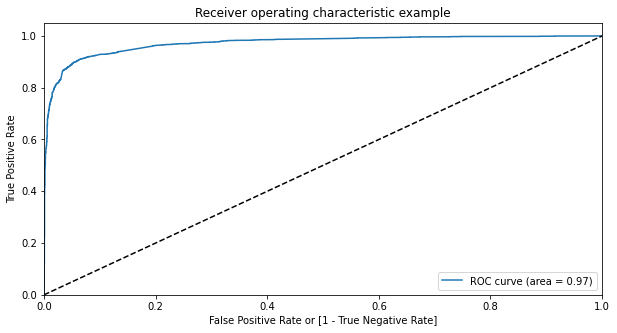

In [1453]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

##### The optimal ROC value should be close to 1. The ROC value we are getting is 0.97 is very close to 1. Hence, our model is a good predictive model.

## Step - 9 : Finding the Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1454]:
# Creating separate column for different cut-offs.
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006172,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.243212,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.004191,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.117609,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.031538,3934,0,1,0,0,0,0,0,0,0,0,0


In [1455]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability_Cutoff','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    Accuracy = (cm[0,0]+cm[1,1])/total
    Sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    Specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probability_Cutoff  Accuracy  Sensitivity  Specificity
0.0                 0.0  0.381262     1.000000     0.000000
0.1                 0.1  0.816172     0.974453     0.718641
0.2                 0.2  0.910328     0.928629     0.899050
0.3                 0.3  0.923006     0.913625     0.928786
0.4                 0.4  0.926871     0.901865     0.942279
0.5                 0.5  0.927489     0.884428     0.954023
0.6                 0.6  0.917749     0.832117     0.970515
0.7                 0.7  0.914502     0.808597     0.979760
0.8                 0.8  0.906153     0.777372     0.985507
0.9                 0.9  0.889920     0.727088     0.990255


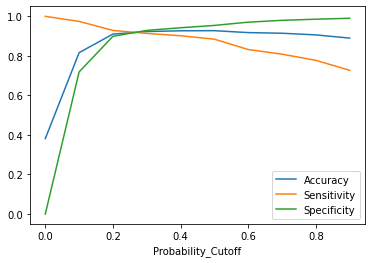

In [1456]:
# Plotting Accuracy ,Sensitivity and Specificity for various probabilities.
cutoff_df.plot.line(x='Probability_Cutoff', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

#### From the above graph and cut-off dataframe, we can conclude that 0.3 is the optimal cut-off with which we can go forward for our model building process.

In [1457]:
# Predicting values with 0.3 as the cut-off value.

y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.006172,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.243212,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.004191,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.117609,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.031538,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [1458]:
# Assigning lead score to each prospect_id.

y_train_pred_final['Lead_Score'] = round(y_train_pred_final.Converted_Prob*100)

y_train_pred_final = y_train_pred_final[['Prospect_ID','Converted','Converted_Prob','Final_Predicted','Lead_Score']]

In [1459]:
y_train_pred_final.head()

,Prospect_ID,Converted,Converted_Prob,Final_Predicted,Lead_Score
0,1871,0,0.006172,0,1.0
1,6795,0,0.243212,0,24.0
2,3516,0,0.004191,0,0.0
3,8105,0,0.117609,0,12.0
4,3934,0,0.031538,0,3.0


In [1460]:
# Model evaluation after changing the cut-off to 0.3
print(model_evaluation(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted))

Confusion Matrix
[[3717  285]
 [ 213 2253]]
********************
Accuracy
0.9230055658627088
********************
Sensitivity
0.9136253041362531
********************
Specificity
0.9287856071964018
********************
False Positive Rate
0.0712143928035982
********************
Positive Predictive Value
0.8877068557919622
********************
Negative Predictive Value
0.9458015267175572
********************
Precision
0.8877068557919622
********************
Recall
0.9136253041362531
********************
None


In [1461]:
from sklearn.metrics import precision_recall_curve

In [1462]:
y_train_pred_final.Converted, y_train_pred_final.Final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

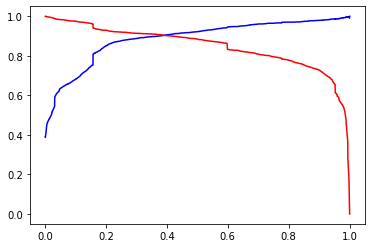

In [1463]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


## Step - 9 : Making predictions on test data.

In [1464]:
X_test = X_test[X_train.columns]
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Tagged,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Last Notable Activity_Modified
4269,0.444982,1.000000,0,1,0,0,0,1,0,0,0,0,0,0
2376,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0
7766,0.025968,0.833333,0,0,0,0,0,0,0,0,1,0,0,0
9199,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,1
4359,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0


In [1465]:
y_test_pred = model.predict(sm.add_constant(X_test))
y_test_pred[:10]

4269    0.685316
2376    0.993734
7766    0.875339
9199    0.003890
4359    0.952273
9186    0.991464
1631    0.973638
8963    0.957532
8007    0.028913
5324    0.990590
dtype: float64

In [1466]:
# Converting y_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame(y_test_pred)

In [1467]:
# Let's see the head
y_test_pred_df.head()

,0
4269,0.685316
2376,0.993734
7766,0.875339
9199,0.003890
4359,0.952273


In [1468]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [1469]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [1470]:
# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1471]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

In [1472]:
y_test_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.685316
1,1,2376,0.993734
2,1,7766,0.875339
3,0,9199,0.003890
4,1,4359,0.952273


In [1473]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1474]:
y_test_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,1,4269,0.685316
1,1,2376,0.993734
2,1,7766,0.875339
3,0,9199,0.003890
4,1,4359,0.952273


In [1475]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final[['Prospect ID','Converted','Converted_Prob']]
y_test_pred_final['Lead_Score'] = round(y_test_pred_final.Converted_Prob*100)

In [1476]:
# Let's see the head of y_pred_final
y_test_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,4269,1,0.685316,69.0
1,2376,1,0.993734,99.0
2,7766,1,0.875339,88.0
3,9199,0,0.003890,0.0
4,4359,1,0.952273,95.0


In [1477]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [1478]:
y_test_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,Final_Predicted
0,4269,1,0.685316,69.0,1
1,2376,1,0.993734,99.0,1
2,7766,1,0.875339,88.0,1
3,9199,0,0.003890,0.0,0
4,4359,1,0.952273,95.0,1


In [1479]:
print(model_evaluation(y_test_pred_final.Converted,y_test_pred_final.Final_Predicted))

Confusion Matrix
[[1552  125]
 [  75 1020]]
********************
Accuracy
0.9278499278499278
********************
Sensitivity
0.9315068493150684
********************
Specificity
0.9254621347644604
********************
False Positive Rate
0.07453786523553965
********************
Positive Predictive Value
0.8908296943231441
********************
Negative Predictive Value
0.9539028887523049
********************
Precision
0.8908296943231441
********************
Recall
0.9315068493150684
********************
None


## STEP - 10 : Final Observation:
#### Let us compare the values obtained for Train & Test:

##### Train Data: 

Accuracy : 92.30%

Sensitivity : 91.36%

Specificity : 92.87%

#### *******************************************************

##### Test Data: 

Accuracy : 92.78%

Sensitivity : 93.15%

Specificity : 92.54%

### Determining Feature Importance.

In [1480]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1284.0
Date:                Tue, 28 Feb 2023   Deviance:                       2567.9
Time:                        13:26:52   Pearson chi2:                 9.65e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6064
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [1481]:
feature_importance = model.params.reset_index()
feature_importance

,index,0
0,const,-3.798542
1,Total Time Spent on Website,3.953614
2,Page Views Per Visit,-1.376402
3,Lead Source_Welingak Website,4.818336
4,Last Activity_SMS Sent,2.072921
5,Tags_Busy,2.524758
6,Tags_Closed by Horizzon,9.968009
7,Tags_Lost to EINS,8.360245
8,Tags_Not Tagged,2.121045
9,Tags_Others,2.919753


In [1482]:
feature_importance = feature_importance.rename(columns={"index" : "Feature Name",0 : "Feature Importance"})
feature_importance

,Feature Name,Feature Importance
0,const,-3.798542
1,Total Time Spent on Website,3.953614
2,Page Views Per Visit,-1.376402
3,Lead Source_Welingak Website,4.818336
4,Last Activity_SMS Sent,2.072921
5,Tags_Busy,2.524758
6,Tags_Closed by Horizzon,9.968009
7,Tags_Lost to EINS,8.360245
8,Tags_Not Tagged,2.121045
9,Tags_Others,2.919753


In [1483]:
feature_importance = feature_importance.sort_values(by = "Feature Importance" , ascending=False)
feature_importance

,Feature Name,Feature Importance
6,Tags_Closed by Horizzon,9.968009
7,Tags_Lost to EINS,8.360245
11,Tags_Will revert after reading the email,6.791887
3,Lead Source_Welingak Website,4.818336
1,Total Time Spent on Website,3.953614
9,Tags_Others,2.919753
5,Tags_Busy,2.524758
8,Tags_Not Tagged,2.121045
4,Last Activity_SMS Sent,2.072921
10,Tags_Ringing,-1.283032


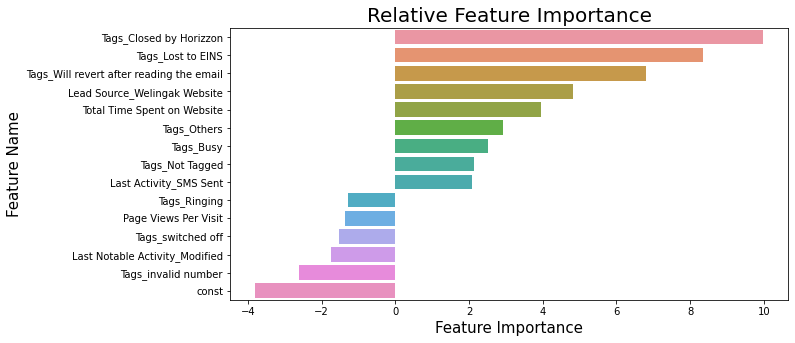

In [1484]:
plt.figure(figsize = [10,5])
sns.barplot(x = "Feature Importance", y = "Feature Name" , data = feature_importance )
plt.title("Relative Feature Importance" , fontdict={"fontsize":20,"fontweight":15})
plt.ylabel("Feature Name" , fontdict={"fontsize":15,"fontweight":10})
plt.xlabel("Feature Importance" , fontdict={"fontsize":15,"fontweight":10})
plt.show()

## Top three variables in our model which contribute most towards the probability of a lead getting converted :

#### 1. Tags_Closed by Horizzon

#### 2. Tags_Lost to EINS

#### 3. Tags_Will revert after reading the email


##### The above features are the dummy features created from original categorical variables. These contribute positively in increasing the conversion  probability.

##### The management should focus more on leads with above mentioned tags to improve their conversion rate.

##### The management should also focus on features with negative coefficients also so that they know which features decrease the conversion probability.

# Thank You